# Unsupervised Clustering using K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random
from sklearn.datasets import make_blobs
%matplotlib inline

Tasodifiy nuqtalar klasterini yaratish uchun `make_blobs` funksiyasidan foydalanamiz. Bu funksiya quyidagi parametrlarni qabul qiladi:
- `n_samples` - nuqtalar soni
- `centers` - klasterlar markazi (sentroid) koordinatalari
-`cluster_std` - markazdan standart og'ish

`make_blobs` funksiyasi nuqtalarning `x` va `y` koordinatalarini qaytaradi.

In [ ]:
np.random.seed(0)
centroids = [[1,5], [4, -2], [0, -5], [2,0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

Nuqtalarni chizamiz

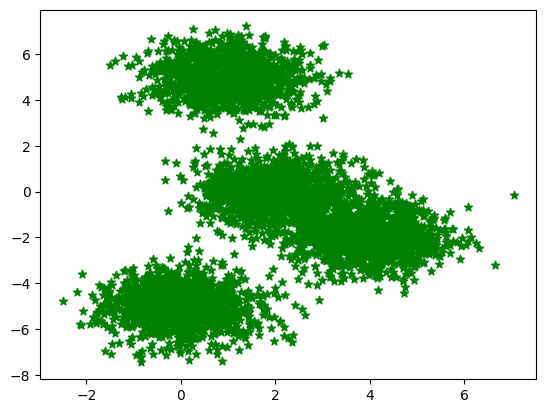

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='*', color = "green")
plt.show()

### k-means algoritmi
`KMeans` funksiyasi quyidagi parametrlarni qabul qiladi:
- `init` - centroidlarni tanlash usuli (`k-means++` yoki `random`)
- `n_clusters` - klasterlar soni
- `n_init` - algoritmni necha marta ishga tushirish (turli sentroidlar bilan qayta-qayta ishga tushirib, modelni qurishni boshlash uchun eng yaxshi sentroidlar tanlanadi)

`KMeans` boshqa parametrlari haqida rasmiy sahifasidan ma'lumot olasiz: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

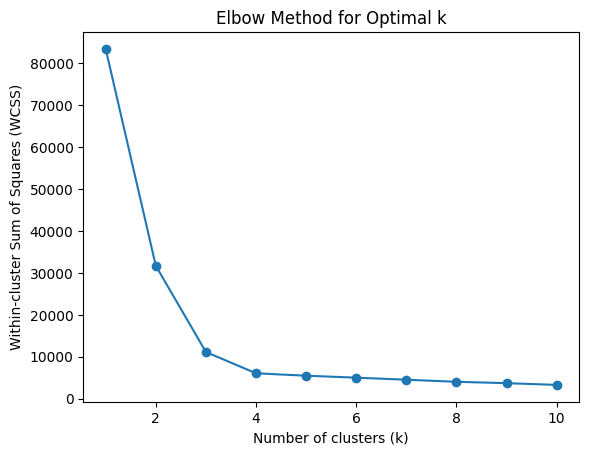

In [ ]:
# Calculate WCSS for each k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Plotting WCSS vs. k
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 15)

In [ ]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=15)

**Klasterlab bo'ldik**

# **Mana kim nima clusterga tegishliligini kormaiz**

In [ ]:
k_means.labels_[:150]

array([1, 2, 2, 1, 0, 2, 2, 3, 0, 3, 2, 2, 2, 3, 2, 1, 1, 0, 0, 2, 3, 3,
       2, 3, 0, 2, 0, 2, 1, 1, 2, 3, 0, 0, 3, 1, 3, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 0, 0, 0, 1, 1, 1, 3, 2, 2, 0, 0, 1, 1, 3, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 3, 2, 1, 0,
       0, 2, 3, 2, 1, 2, 2, 2, 1, 0, 2, 3, 2, 0, 2, 1, 3, 1, 1, 3, 3, 0,
       3, 1, 3, 0, 3, 0, 1, 1, 2, 1, 3, 1, 0, 3, 0, 0, 3, 1, 1, 0, 1, 1,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 3, 0, 1, 3, 1, 2, 3, 0, 2], dtype=int32)

***Tepada birinchi 150 ta nuqtani qaysi klassga tegishli ekanini korishimiz mumkin. ***

# **Centroidlar oxir oqibat qayerga joylashganini ko'rishlik uchun. Centroidlarni koordinatasi**

In [ ]:
k_means.cluster_centers_

array([[ 9.75107635e-01,  4.99523694e+00],
       [ 3.99065062e+00, -2.01223883e+00],
       [ 2.37252318e-03, -5.01520342e+00],
       [ 1.95555517e+00, -3.92772732e-03]])

Let's visualize this

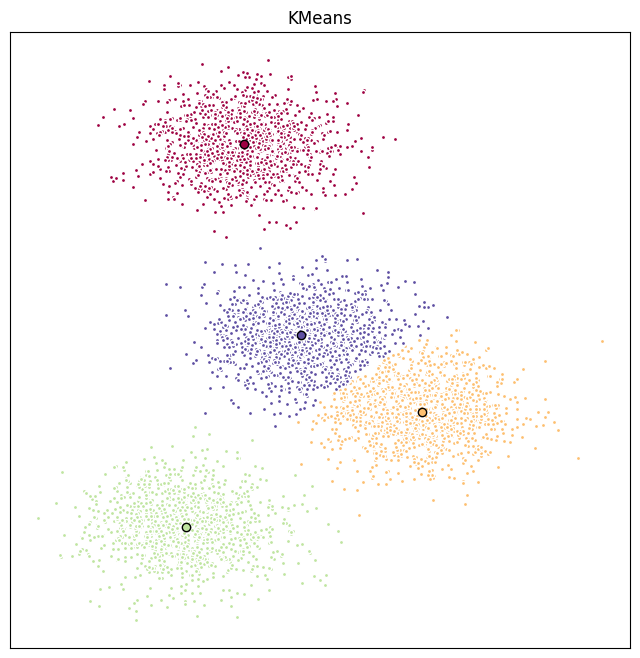

In [ ]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()